In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
household_s = pd.read_csv('summer_household_energydata.csv', index_col=0)
household_w = pd.read_csv('winter_household_energydata.csv', index_col=0)

duration = 24 * 4  # 24 hours, 15 minutes per time step per day

ev_in = 24 # plug in at 2016-05-01 18:00
ev_out = 88
soc_demand = 6
energy_rate = 1 
# initial time series
critical_tot = np.array(household_s['Critical Appliances'])
wm_tot = np.array(household_s['Washing Machine'])
dishwasher_tot = np.array(household_s['Dishwasher'])
pv_tot_s = np.array(household_s['PV']) # The assumption is that our prediction of pv generation is 100% accurate

ev_b = np.zeros(96) # initialize the EV profile
ev_b[ev_in:ev_in+int(np.ceil(soc_demand/energy_rate))] = energy_rate # dumb charging of EV, charging at 4 kW starting at 18:00 to fill the depletion of 6 kWh

price_s = np.array(household_s['Dynamic Price']) / 1000 # convert to euro/kWh

# benchmark
wm_b_s = wm_tot[96:2*96]
dw_b_s = dishwasher_tot[96:2*96]
critical_s = critical_tot[96:2*96]

critical_tot = np.array(household_w['Critical Appliances'])
wm_tot = np.array(household_w['Washing Machine'])
dishwasher_tot = np.array(household_w['Dishwasher'])
pv_tot_w = np.array(household_w['PV']) # The assumption is that our prediction of pv generation is 100% accurate
price_w = np.array(household_w['Dynamic Price']) / 1000 # convert to euro/kWh
# benchmark
wm_b_w = wm_tot[0:96]
dw_b_w = dishwasher_tot[0:96]
critical_w = critical_tot[0:96]

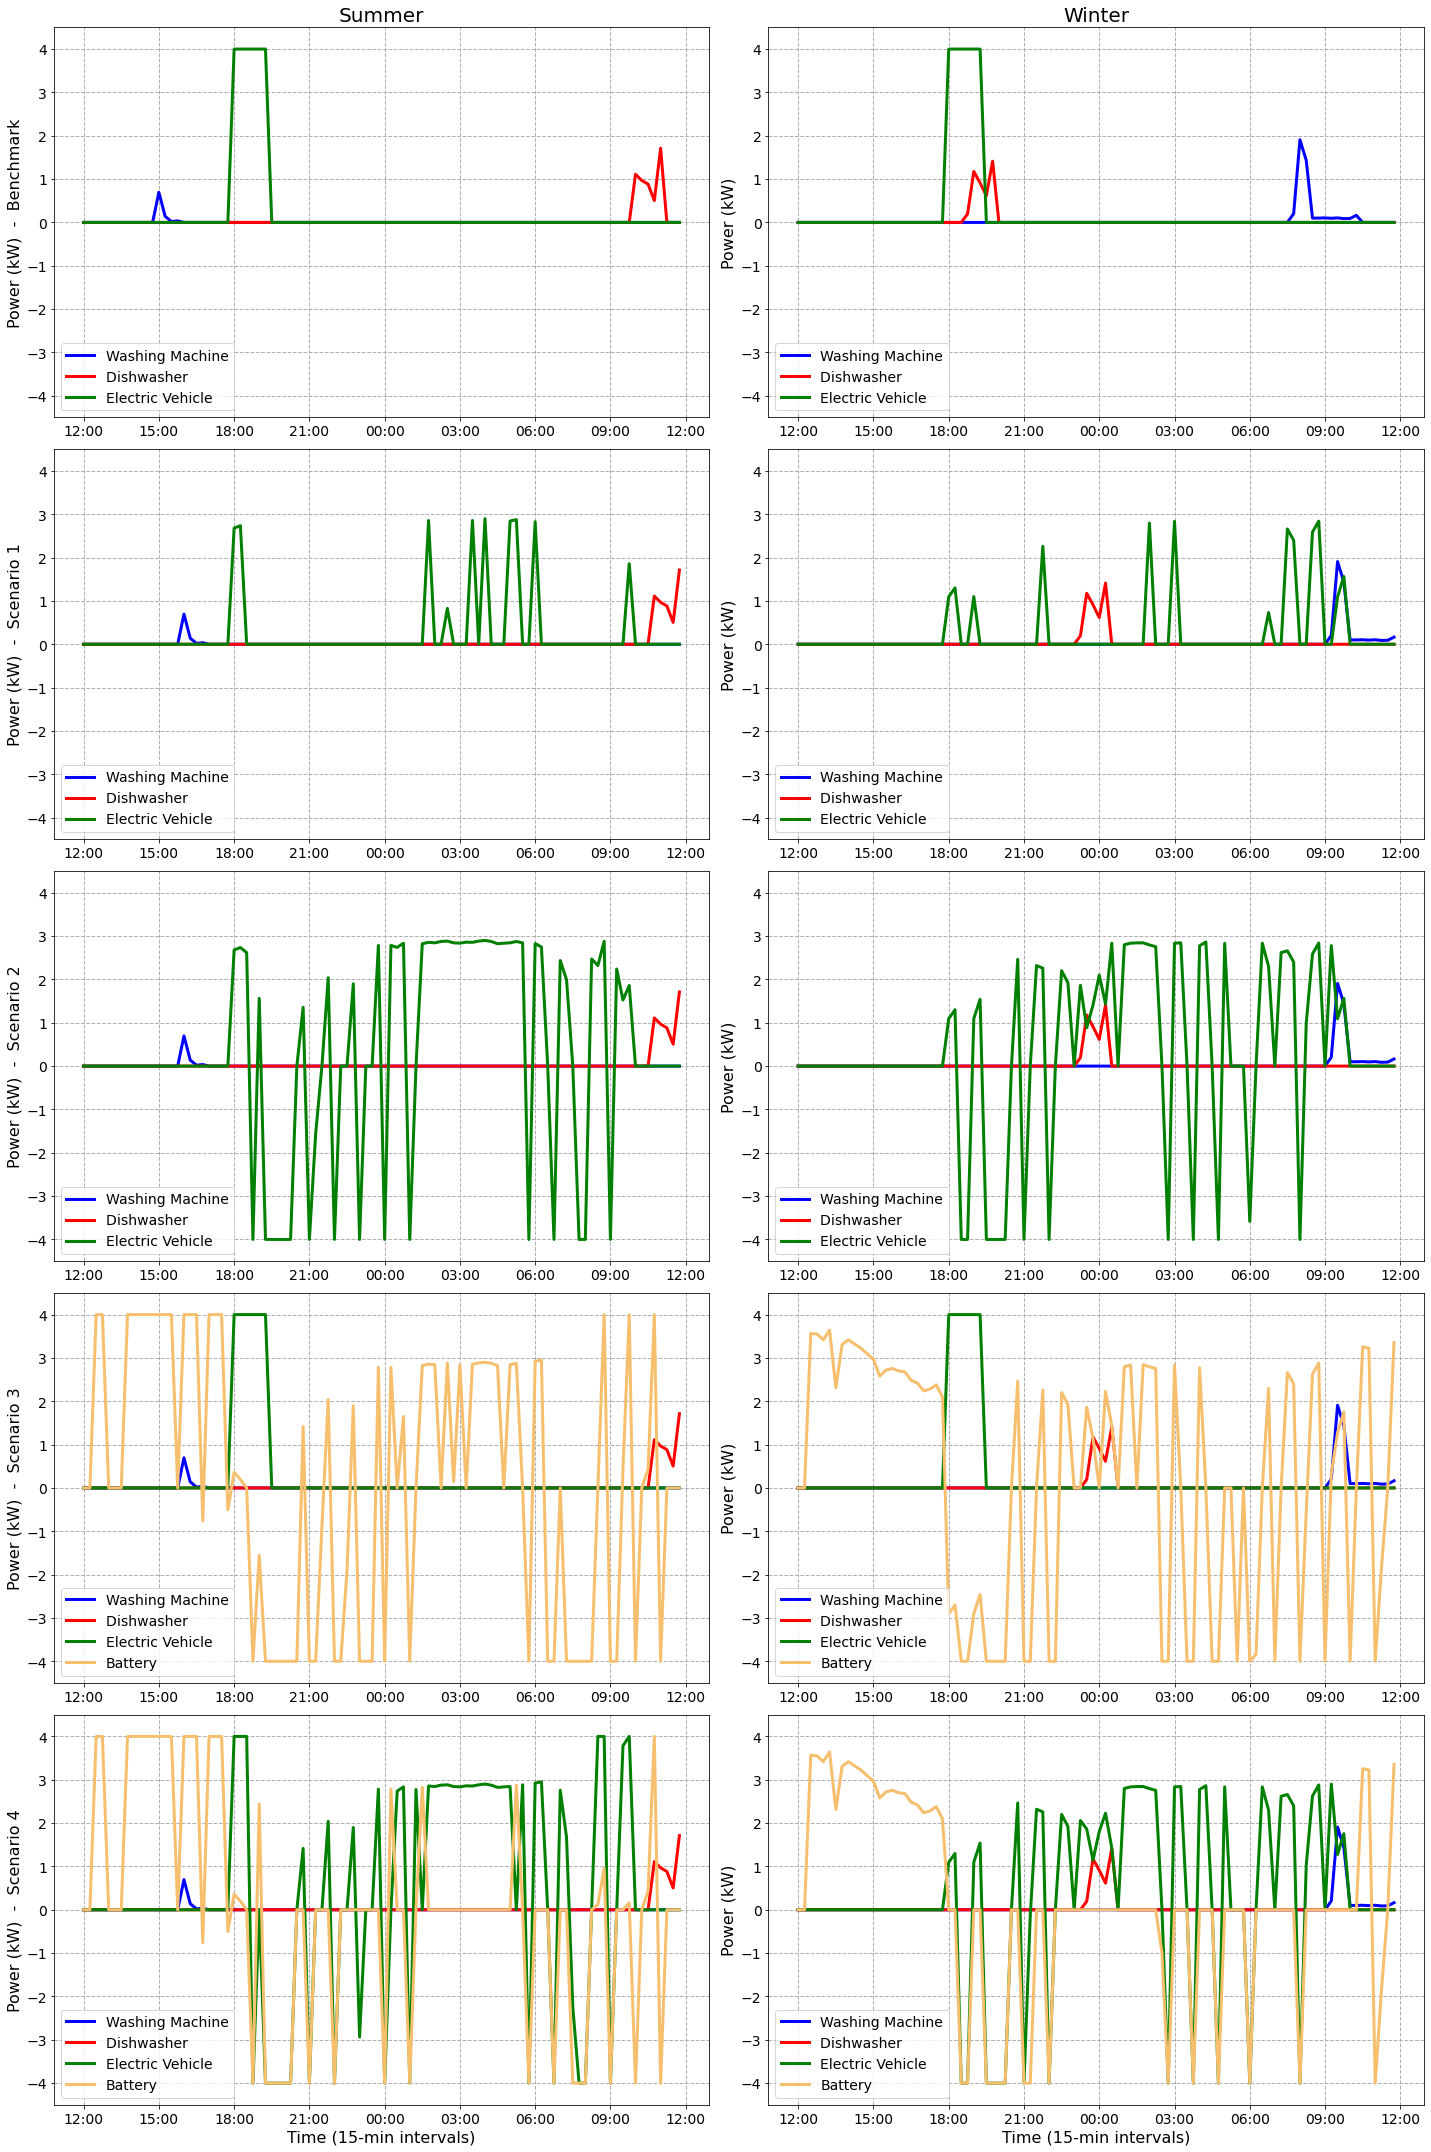

<Figure size 432x288 with 0 Axes>

In [4]:
s1_summer = pd.read_csv('./output/summer_scenario1.csv')
s1_winter = pd.read_csv('./output/winter_scenario1.csv')
s2_summer = pd.read_csv('./output/summer_scenario2.csv')
s2_winter = pd.read_csv('./output/winter_scenario2.csv')
s3_summer = pd.read_csv('./output/summer_scenario3.csv')
s3_winter = pd.read_csv('./output/winter_scenario3.csv')
s4_summer = pd.read_csv('./output/summer_scenario4.csv')
s4_winter = pd.read_csv('./output/winter_scenario4.csv')

wm_s1_s = np.array(s1_summer['wm'][96:2*96])
dw_s1_s = np.array(s1_summer['dw'][96:2*96])
ev_s1_s = np.array(s1_summer['ev'][96:2*96])

wm_s1_w = s1_winter['wm'][0:96]
dw_s1_w = s1_winter['dw'][0:96]
ev_s1_w = s1_winter['ev'][0:96]


wm_s2_s = np.array(s2_summer['wm'][96:2*96])
dw_s2_s = np.array(s2_summer['dw'][96:2*96])
ev_s2_s = np.array(s2_summer['ev'][96:2*96])

wm_s2_w = s2_winter['wm'][0:96]
dw_s2_w = s2_winter['dw'][0:96]
ev_s2_w = s2_winter['ev'][0:96]

wm_s3_s = np.array(s3_summer['wm'][96:2*96])
dw_s3_s = np.array(s3_summer['dw'][96:2*96])
ev_s3_s = np.array(s3_summer['ev'][96:2*96])
ba_s3_s = np.array(s3_summer['pv_bess'][96:2*96])

wm_s3_w = s3_winter['wm'][0:96]
dw_s3_w = s3_winter['dw'][0:96]
ev_s3_w = s3_winter['ev'][0:96]
ba_s3_w = s3_winter['pv_bess'][0:96]

wm_s4_s = np.array(s4_summer['wm'][96:2*96])
dw_s4_s = np.array(s4_summer['dw'][96:2*96])
ev_s4_s = np.array(s4_summer['ev'][96:2*96])
ba_s4_s = np.array(s4_summer['pv_bess'][96:2*96])

wm_s4_w = s4_winter['wm'][0:96]
dw_s4_w = s4_winter['dw'][0:96]
ev_s4_w = s4_winter['ev'][0:96]
ba_s4_w = s4_winter['pv_bess'][0:96]

time_stamp = [f'{i:02d}:00' for i in range(12, 24, 3)] + [f'{i:02d}:00' for i in range(0, 13, 3)]

# Benchmark
plt.figure(figsize=(20, 30))
plt.subplot(5, 2, 1)
plt.plot(wm_b_s*4, label='Washing Machine', color='blue', linewidth=3)
plt.plot(dw_b_s*4, label='Dishwasher ', color='red', linewidth=3)
plt.plot(ev_b*4, label='Electric Vehicle', color='green', linewidth=3)
plt.legend(loc='lower left')
plt.title('Summer', fontsize=20)
plt.legend(loc='lower left', fontsize=14)
plt.ylabel('Power (kW)  -  Benchmark', fontsize=16)
plt.xticks(np.arange(0, 97, 12), time_stamp, fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(-4.5, 4.5)
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=1)

plt.subplot(5, 2, 2)
plt.plot(wm_b_w*4, label='Washing Machine', color='blue', linewidth=3)
plt.plot(dw_b_w*4, label='Dishwasher ', color='red', linewidth=3)
plt.plot(ev_b*4, label='Electric Vehicle', color='green', linewidth=3)
plt.title('Winter', fontsize=20)
plt.legend(loc='lower left', fontsize=14)
plt.ylabel('Power (kW)', fontsize=16)
plt.xticks(np.arange(0, 97, 12), time_stamp, fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(-4.5, 4.5)
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=1)

# scenario 1
plt.subplot(5, 2, 3)
plt.plot(wm_s1_s*4, label='Washing Machine', color='blue', linewidth=3)
plt.plot(dw_s1_s*4, label='Dishwasher ', color='red', linewidth=3)
plt.plot(ev_s1_s*4, label='Electric Vehicle', color='green', linewidth=3)
plt.legend(loc='lower left', fontsize=14)
plt.ylabel('Power (kW)  -  Scenario 1', fontsize=16)
plt.xticks(np.arange(0, 97, 12), time_stamp, fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(-4.5, 4.5)
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=1)

plt.subplot(5, 2, 4)
plt.plot(wm_s1_w*4, label='Washing Machine', color='blue', linewidth=3)
plt.plot(dw_s1_w*4, label='Dishwasher ', color='red', linewidth=3)
plt.plot(ev_s1_w*4, label='Electric Vehicle', color='green', linewidth=3)
plt.legend(loc='lower left', fontsize=14)
plt.ylabel('Power (kW)', fontsize=16)
plt.yticks(fontsize=14)
plt.ylim(-4.5, 4.5)
plt.xticks(np.arange(0, 97, 12), time_stamp, fontsize=14)
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=1)

# scenario 2
plt.subplot(5, 2, 5)
plt.plot(wm_s2_s*4, label='Washing Machine', color='blue', linewidth=3)
plt.plot(dw_s2_s*4, label='Dishwasher ', color='red', linewidth=3)
plt.plot(ev_s2_s*4, label='Electric Vehicle', color='green', linewidth=3)
plt.legend(loc='lower left', fontsize=14)
plt.ylabel('Power (kW)  -  Scenario 2', fontsize=16)
plt.ylim(-4.5, 4.5)
plt.yticks(fontsize=14)
plt.xticks(np.arange(0, 97, 12), time_stamp, fontsize=14)
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=1)

plt.subplot(5, 2, 6)
plt.plot(wm_s2_w*4, label='Washing Machine', color='blue', linewidth=3)
plt.plot(dw_s2_w*4, label='Dishwasher ', color='red', linewidth=3)
plt.plot(ev_s2_w*4, label='Electric Vehicle', color='green', linewidth=3)
plt.legend(loc='lower left', fontsize=14)
plt.ylabel('Power (kW)', fontsize=16)
plt.ylim(-4.5, 4.5)
plt.yticks(fontsize=14)
plt.xticks(np.arange(0, 97, 12), time_stamp, fontsize=14)
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=1)

# scenario 3
plt.subplot(5, 2, 7)
plt.plot(wm_s3_s*4, label='Washing Machine', color='blue', linewidth=3)
plt.plot(dw_s3_s*4, label='Dishwasher ', color='red', linewidth=3)
plt.plot(ev_s3_s*4, label='Electric Vehicle', color='green', linewidth=3)
plt.plot(ba_s3_s*4, label='Battery', color="#F6BF6D", linewidth=3)
plt.legend(loc='lower left', fontsize=14)
plt.ylabel('Power (kW)  -  Scenario 3', fontsize=16)
plt.ylim(-4.5, 4.5)
plt.yticks(fontsize=14)
plt.xticks(np.arange(0, 97, 12), time_stamp, fontsize=14)
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=1)

plt.subplot(5, 2, 8)
plt.plot(wm_s3_w*4, label='Washing Machine', color='blue', linewidth=3)
plt.plot(dw_s3_w*4, label='Dishwasher ', color='red', linewidth=3)
plt.plot(ev_s3_w*4, label='Electric Vehicle', color='green', linewidth=3)
plt.plot(ba_s3_w*4, label='Battery', color="#F6BF6D", linewidth=3)
plt.legend(loc='lower left', fontsize=14)
plt.ylabel('Power (kW)', fontsize=16)
plt.ylim(-4.5, 4.5)
plt.yticks(fontsize=14)
plt.xticks(np.arange(0, 97, 12), time_stamp, fontsize=14)
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=1)

# scenario 4
plt.subplot(5, 2, 9)
plt.plot(wm_s4_s*4, label='Washing Machine', color='blue', linewidth=3)
plt.plot(dw_s4_s*4, label='Dishwasher ', color='red', linewidth=3)
plt.plot(ev_s4_s*4, label='Electric Vehicle', color='green', linewidth=3)
plt.plot(ba_s4_s*4, label='Battery', color="#F6BF6D", linewidth=3)
plt.legend(loc='lower left', fontsize=14)
plt.xlabel('Time (15-min intervals)', fontsize=16)
plt.ylabel('Power (kW)  -  Scenario 4', fontsize=16)
plt.ylim(-4.5, 4.5)
plt.yticks(fontsize=14)
plt.xticks(np.arange(0, 97, 12), time_stamp, fontsize=14)
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=1)

plt.subplot(5, 2, 10)
plt.plot(wm_s4_w*4, label='Washing Machine', color='blue', linewidth=3)
plt.plot(dw_s4_w*4, label='Dishwasher ', color='red', linewidth=3)
plt.plot(ev_s4_w*4, label='Electric Vehicle', color='green', linewidth=3)
plt.plot(ba_s4_w*4, label='Battery', color="#F6BF6D", linewidth=3)
plt.legend(loc='lower left', fontsize=14)
plt.xlabel('Time (15-min intervals)', fontsize=16)
plt.ylabel('Power (kW)', fontsize=16)
plt.ylim(-4.5, 4.5)
plt.yticks(fontsize=14)
plt.xticks(np.arange(0, 97, 12), time_stamp, fontsize=14)
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()
plt.savefig('scenarios_comparison.png', dpi=300)

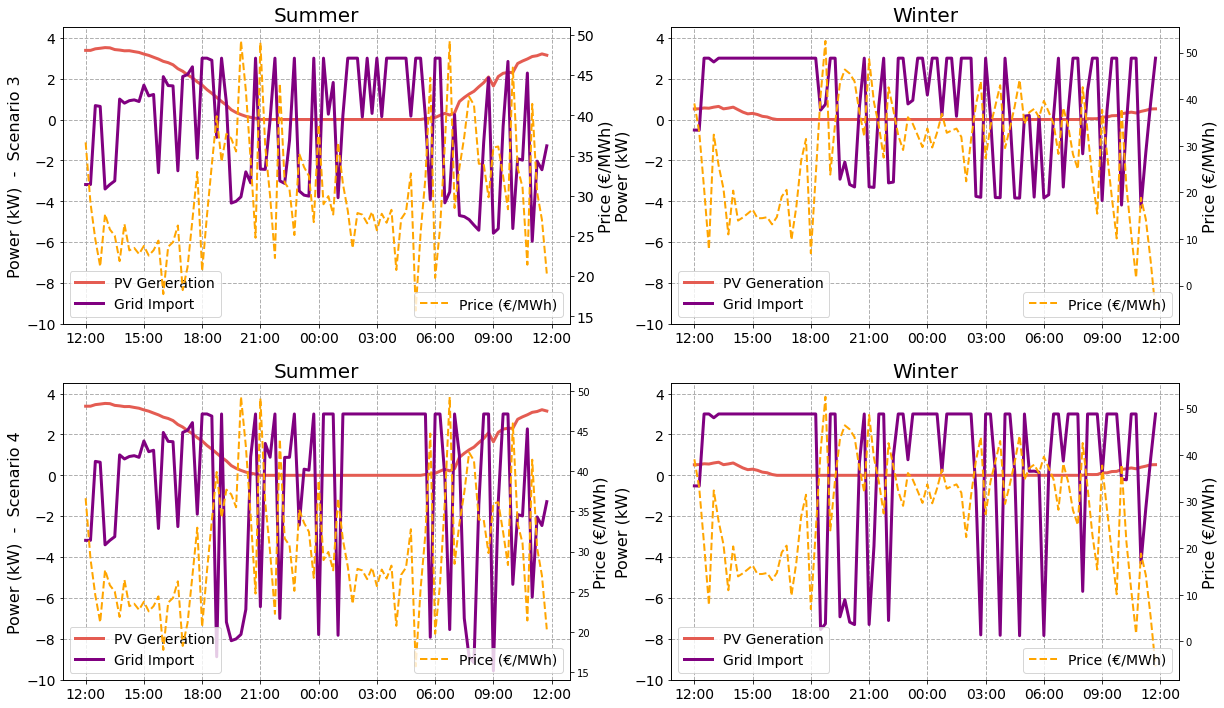

In [ ]:
plt.figure(figsize=(20, 12))

plt.subplot(2, 2, 1)
plt.plot(pv_tot_s[96:2*96]*4, label='PV Generation', color="#e45c52", linewidth=3)
gimport = critical_s + wm_s3_s + dw_s3_s + ev_s3_s + ba_s3_s - pv_tot_s[96:2*96]
plt.plot(gimport*4, label='Grid Import', color="purple", linewidth=3)
plt.legend(loc='lower left', fontsize=14)
plt.title('Summer', fontsize=20)
plt.ylabel('Power (kW)  -  Scenario 3', fontsize=16)
plt.xticks(np.arange(0, 97, 12), time_stamp, fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(-10, 4.5)
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=1)

ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.plot(price_s[96:2*96]*1000, label='Price (€/MWh)', color='orange', linewidth=2, linestyle='--')
ax2.set_ylabel('Price (€/MWh)', fontsize=16)
ax2.tick_params(axis='y', labelsize=14)
# ax2.tick_params(axis='y', labelcolor='orange')
ax2.legend(loc='lower right', fontsize=14)

plt.subplot(2, 2, 2)
plt.plot(pv_tot_w[0:96]*4, label='PV Generation', color="#e45c52", linewidth=3)
gimport = critical_w + wm_s3_w + dw_s3_w + ev_s3_w + ba_s3_w - pv_tot_w[0:96]
plt.plot(gimport*4, label='Grid Import', color="purple", linewidth=3)
plt.legend(loc='lower left', fontsize=14)
plt.title('Winter', fontsize=20)
plt.ylabel('Power (kW)', fontsize=16)
plt.xticks(np.arange(0, 97, 12), time_stamp, fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(-10, 4.5)
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=1)
ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.plot(price_w[0:96]*1000, label='Price (€/MWh)', color='orange', linewidth=2, linestyle='--')
ax2.set_ylabel('Price (€/MWh)', fontsize=16)
ax2.tick_params(axis='y', labelsize=14)
# ax2.tick_params(axis='y', labelcolor='orange')
ax2.legend(loc='lower right', fontsize=14)


plt.subplot(2, 2, 3)
plt.plot(pv_tot_s[96:2*96]*4, label='PV Generation', color="#e45c52", linewidth=3)
gimport = critical_s + wm_s4_s + dw_s4_s + ev_s4_s + ba_s4_s - pv_tot_s[96:2*96]
plt.plot(gimport*4, label='Grid Import', color="purple", linewidth=3)
plt.legend(loc='lower left', fontsize=14)
plt.title('Summer', fontsize=20)
plt.ylabel('Power (kW)  -  Scenario 4', fontsize=16)
plt.xticks(np.arange(0, 97, 12), time_stamp, fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(-10, 4.5)
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=1)
ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.plot(price_s[96:2*96]*1000, label='Price (€/MWh)', color='orange', linewidth=2, linestyle='--')
ax2.set_ylabel('Price (€/MWh)', fontsize=16)
ax2.tick_params(axis='y', labelsize=14)
# ax2.tick_params(axis='y', labelcolor='orange')
ax2.legend(loc='lower right', fontsize=14)

plt.subplot(2, 2, 4)
plt.plot(pv_tot_w[0:96]*4, label='PV Generation', color="#e45c52", linewidth=3)
gimport = critical_w + wm_s4_w + dw_s4_w + ev_s4_w + ba_s4_w - pv_tot_w[0:96]
plt.plot(gimport*4, label='Grid Import', color="purple", linewidth=3)
plt.legend(loc='lower left', fontsize=14)
plt.title('Winter', fontsize=20)
plt.ylabel('Power (kW)', fontsize=16)
plt.xticks(np.arange(0, 97, 12), time_stamp, fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(-10, 4.5)
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=1)
ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.plot(price_w[0:96]*1000, label='Price (€/MWh)', color='orange', linewidth=2, linestyle='--')
ax2.set_ylabel('Price (€/MWh)', fontsize=16)
ax2.tick_params(axis='y', labelsize=14)
# ax2.tick_params(axis='y', labelcolor='orange')
ax2.legend(loc='lower right', fontsize=14)

In [14]:
len(ba_s3_s)

96

In [9]:
grid_import[grid_import > 1]

2      1.120
3      1.241
7      1.170
8      1.145
9      1.105
       ...  
598    1.050
600    1.180
601    1.135
602    1.046
667    1.010
Length: 145, dtype: float64

In [4]:
np.sum(ev)

42.0